In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data


<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
 df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15 , random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# paramter grid for gridsearchcv
param_grid = {'n_estimators':[50,100], 'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [13]:
model = GradientBoostingClassifier()

In [14]:
grid_model = GridSearchCV(estimator=model, param_grid=param_grid)

In [15]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [29]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [19]:
grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Above we can se ethe best parameters the model got using gridsearchcv

In [22]:
# Evaluation

In [23]:
preds = grid_model.predict(X_test)

In [28]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [24]:
accuracy_score(y_test, preds)

1.0

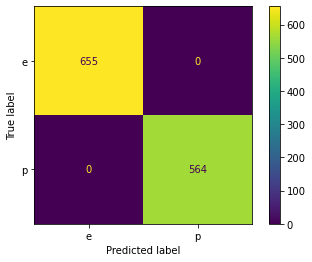

In [26]:
plot_confusion_matrix(grid_model, X_test, y_test);

In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



#### So we can see that it was a perfect model that got 100% accuracy

### Looking at important features

For other models we directly use model.feature_importances_

But for a gridssearch/gridsearchcv model we need to use model.best_estimator.feature_importances_

In [30]:
grid_model.best_estimator_.feature_importances_

array([2.91150176e-04, 1.96672866e-16, 2.40835436e-18, 0.00000000e+00,
       1.47006478e-16, 1.04524302e-03, 0.00000000e+00, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 5.89337817e-18, 0.00000000e+00,
       4.59191463e-17, 1.09176634e-21, 0.00000000e+00, 2.22085608e-08,
       2.31055039e-03, 5.22146681e-02, 1.84253604e-04, 1.72166020e-02,
       1.82499853e-02, 1.70392552e-06, 6.14762854e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 2.81038165e-16, 0.00000000e+00,
       0.00000000e+00, 1.24437884e-21, 0.00000000e+00, 6.21919411e-18,
       9.41829018e-17, 0.00000000e+00, 1.62258430e-17, 8.17702464e-18,
       2.92091629e-04, 3.46490365e-04, 1.36011715e-01, 0.00000000e+00,
       2.85214022e-02, 4.64723214e-04, 1.43555976e-03, 8.23950030e-05,
       1.83319493e-05, 1.35380870e-07, 4.09746893e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.76478844e-04, 0.00000000e+00,
      

In [31]:
# Let's create a dataframe to plot these out

In [32]:
feat_import = grid_model.best_estimator_.feature_importances_

In [33]:
imp_feats = pd.DataFrame(index=X.columns, data=feat_import,columns=['Importance'])

In [35]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]

In [42]:
imp_feats = imp_feats.sort_values('Importance')
imp_feats

,Importance
population_y,0.000550
stalk-color-below-ring_w,0.000563
population_v,0.000631
ring-type_p,0.000653
stalk-color-above-ring_n,0.000676
cap-surface_g,0.001045
population_c,0.001174
stalk-surface-above-ring_s,0.001436
cap-color_y,0.002311
stalk-color-below-ring_y,0.003024


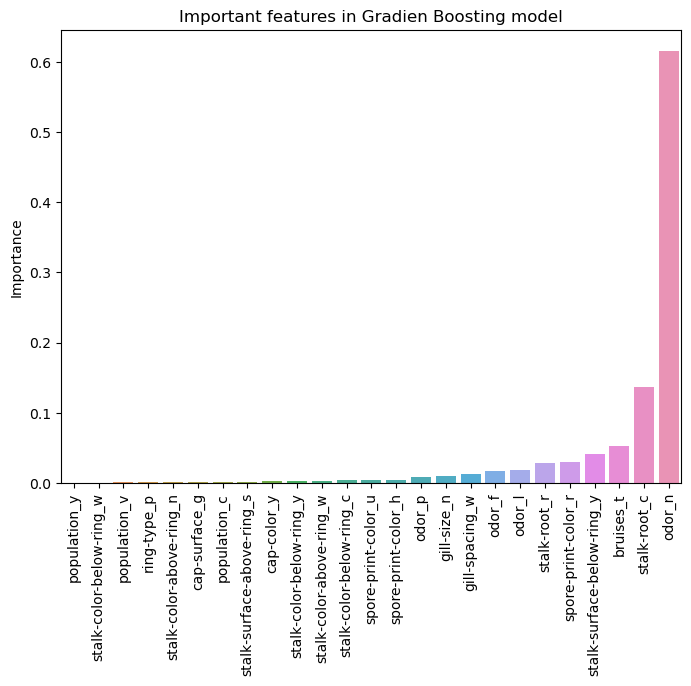

In [43]:
# plotting it out

plt.figure(figsize=(8,6), dpi=100)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Importance')
plt.title('Important features in Gradien Boosting model')
plt.xticks(rotation=90);

Just we saw earlier when we were dealing with adaptive boosting with one single stump, it looks like having no odor is now a very important feature and it's quite more important than any other feature.

So, again, if we were developing guidelines telling people to check, does this mushroom have an odor or not, would be a very good guideline to just sit there without having to check a multitude of features, even though obviously our gradient boosting model can check more than just one single feature.